In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train1 = pd.read_csv('Train_Data_Final.csv')

In [3]:
train1.drop('id',axis=1,inplace=True)

In [4]:
train1['RH_type'].unique()

array(['Ideal', 'Slightly Elevated', 'Elevated', 'High', 'Dry'],
      dtype=object)

In [5]:
train1

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH_type
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,0.757754,Ideal
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,0.725487,Ideal
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,0.750239,Slightly Elevated
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,0.786713,Slightly Elevated
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,0.788794,Slightly Elevated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2005-02-06,21:00:00,1.4,937.50,-200,3.667817,692.00,192.9,937.00,149.0,804.75,737.00,5.775,0.328561,Ideal
7996,2005-02-06,22:00:00,1.1,896.25,-200,2.611733,627.00,157.8,1033.25,126.3,781.50,610.00,5.375,0.330403,Ideal
7997,2005-02-06,23:00:00,1.0,907.25,-200,2.415395,613.75,149.8,1052.00,119.8,781.75,627.00,5.100,0.335822,Ideal
7998,2005-02-07,00:00:00,1.1,902.25,-200,2.397211,612.50,130.3,1049.25,109.5,776.75,565.75,4.825,0.330045,Ideal


In [6]:
category_mapping = {
    'Ideal': 0,
    'Slightly Elevated': 1,
    'Elevated': 2,
    'High': 3,
    'Dry': 4
}

train1['RH_type'] = train1['RH_type'].map(category_mapping)
y = train1['RH_type']

In [7]:
train1

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH_type
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,0.757754,0
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,0.725487,0
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,0.750239,1
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,0.786713,1
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,0.788794,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2005-02-06,21:00:00,1.4,937.50,-200,3.667817,692.00,192.9,937.00,149.0,804.75,737.00,5.775,0.328561,0
7996,2005-02-06,22:00:00,1.1,896.25,-200,2.611733,627.00,157.8,1033.25,126.3,781.50,610.00,5.375,0.330403,0
7997,2005-02-06,23:00:00,1.0,907.25,-200,2.415395,613.75,149.8,1052.00,119.8,781.75,627.00,5.100,0.335822,0
7998,2005-02-07,00:00:00,1.1,902.25,-200,2.397211,612.50,130.3,1049.25,109.5,776.75,565.75,4.825,0.330045,0


In [8]:
train1.replace(-200, np.nan, inplace=True)

In [9]:
train1.drop(['Date','Time'] ,axis=1,inplace=True)

<Axes: >

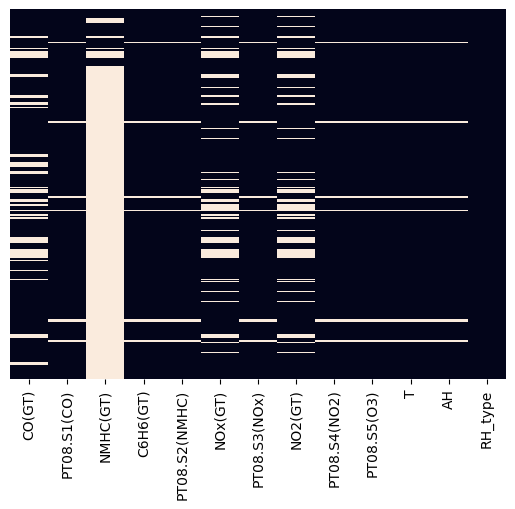

In [10]:
sns.heatmap(train1.isnull(),yticklabels=False,cbar=False)

In [11]:
#NMHC is of no use as it contains too many missing values

In [12]:
train1.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'AH', 'RH_type'],
      dtype='object')

In [13]:
train1.drop('NMHC(GT)',axis=1,inplace=True)

<Axes: >

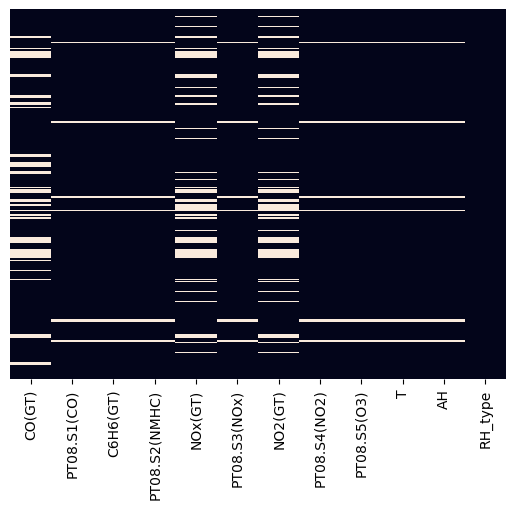

In [14]:
sns.heatmap(train1.isnull(),yticklabels=False,cbar=False)

In [15]:
train1.dropna(thresh=train1.shape[1]-3, inplace=True)

<Axes: >

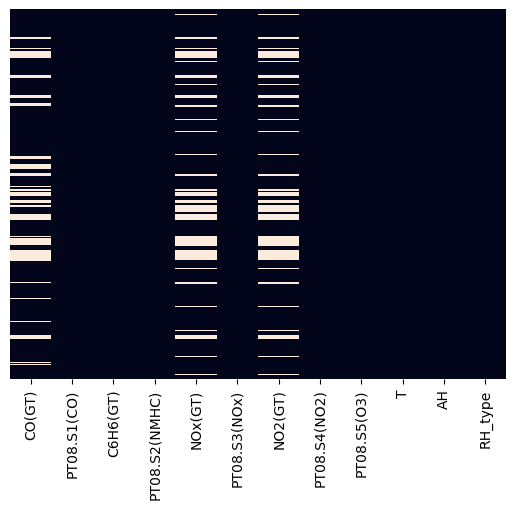

In [16]:
sns.heatmap(train1.isnull(),yticklabels=False,cbar=False)

In [17]:
from sklearn.impute import KNNImputer

# Create an instance of KNNImputer
imputer = KNNImputer()

# Fit the imputer on the train1 DataFrame
imputer.fit(train1.drop('RH_type',axis=1))

# Transform the train1 DataFrame to impute missing values
train1_imputed = imputer.transform(train1.drop('RH_type',axis=1))


In [18]:
train1_imputed = pd.DataFrame(train1_imputed, columns=train1.drop('RH_type',axis=1).columns)

<Axes: >

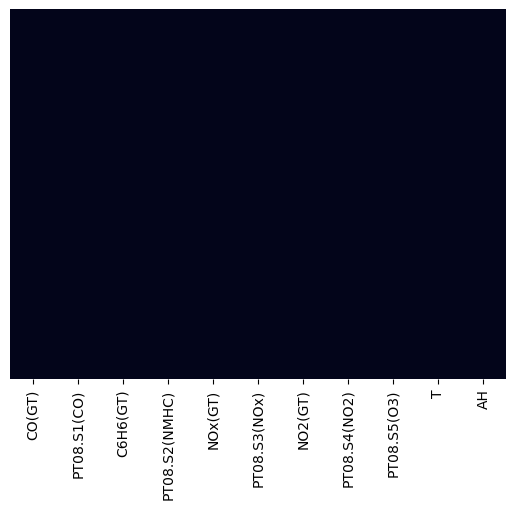

In [19]:
sns.heatmap(train1_imputed.isnull(),yticklabels=False,cbar=False)

In [20]:
train1_imputed['RH_type'] = train1['RH_type']

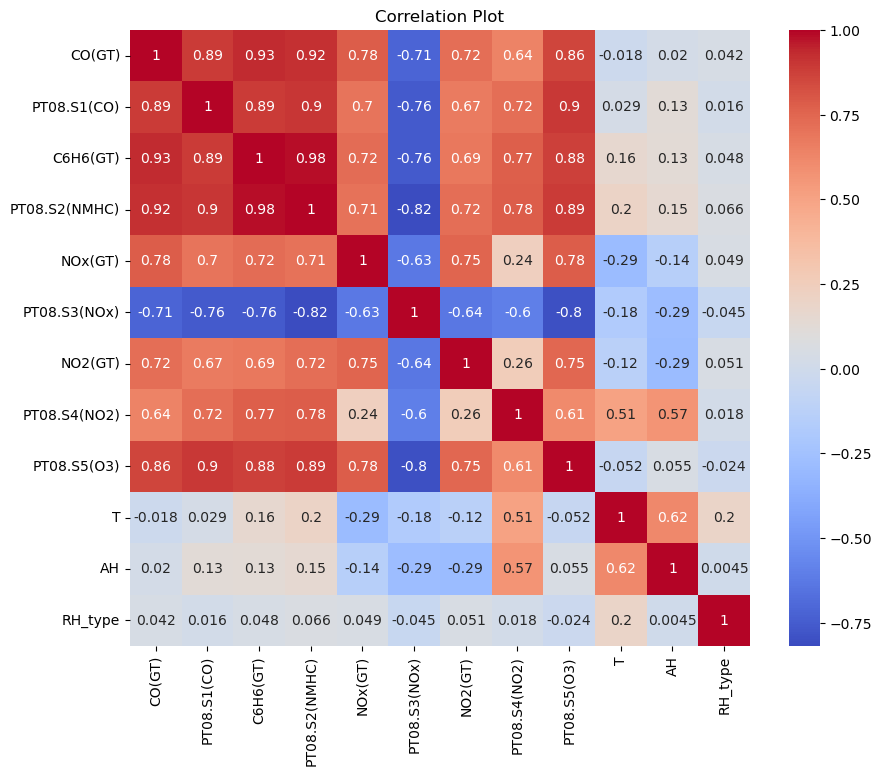

In [21]:
plt.figure(figsize=(10, 8))  # Set the figure size to 10x8 inches
sns.heatmap(train1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()


In [22]:
train1_imputed['log_AH'] = np.log(train1_imputed['AH'])
train1_imputed['log_T'] = np.log(train1_imputed['T'])
train1_imputed['T^2'] = train1_imputed['T']**2
train1_imputed['log_AH / T'] = train1_imputed['log_AH'] / train1_imputed['T']
train1_imputed['log_AH / T^2'] = train1_imputed['log_AH'] * train1_imputed['T^2']
train1_imputed['log_AH * T'] = train1_imputed['log_AH'] * train1_imputed['T']
train1_imputed['AH * T'] = train1_imputed['AH'] * train1_imputed['T']

In [23]:
train1_imputed.columns

Index(['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH',
       'RH_type', 'log_AH', 'log_T', 'T^2', 'log_AH / T', 'log_AH / T^2',
       'log_AH * T', 'AH * T'],
      dtype='object')

In [24]:
X = train1_imputed[['T', 'AH' ,'log_AH', 'log_T', 'T^2', 'log_AH / T', 'log_AH / T^2','log_AH * T','PT08.S2(NMHC)','RH_type']]
y= train1['RH_type']

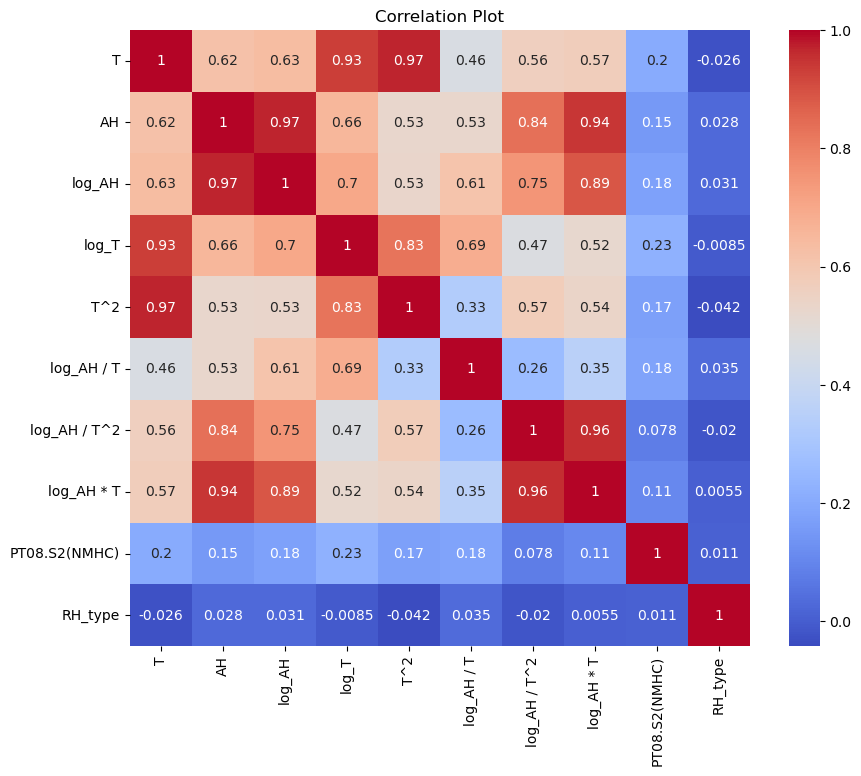

In [25]:
plt.figure(figsize=(10, 8))  # Set the figure size to 10x8 inches
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()


In [26]:
#as other features are highly correlated with PT08.S2(NMHC) we won't use it as it will lead to the problem of multicollinearity

In [27]:
X = train1_imputed[['T', 'AH' ,'log_AH', 'log_T', 'T^2', 'log_AH / T', 'log_AH / T^2','log_AH * T','AH * T']]
y= train1['RH_type']

In [28]:
X

,T,AH,log_AH,log_T,T^2,log_AH / T,log_AH / T^2,log_AH * T,AH * T
0,13.600,0.757754,-0.277397,2.610070,184.959997,-0.020397,-51.307296,-3.772595,10.305452
1,13.300,0.725487,-0.320912,2.587764,176.889999,-0.024129,-56.766036,-4.268123,9.648983
2,11.900,0.750239,-0.287363,2.476538,141.610002,-0.024148,-40.693527,-3.419624,8.927845
3,11.000,0.786713,-0.239892,2.397895,121.000000,-0.021808,-29.026976,-2.638816,8.653838
4,11.150,0.788794,-0.237250,2.411440,124.322502,-0.021278,-29.495487,-2.645335,8.795056
...,...,...,...,...,...,...,...,...,...
7706,5.775,0.328561,-1.113031,1.753538,33.350626,-0.192733,-37.120292,-6.427756,1.897443
7707,5.375,0.330403,-1.107441,1.681759,28.890625,-0.206035,-31.994657,-5.952494,1.775919
7708,5.100,0.335822,-1.091173,1.629241,26.010000,-0.213955,-28.381407,-5.564982,1.712694
7709,4.825,0.330045,-1.108526,1.573811,23.280624,-0.229746,-25.807187,-5.348640,1.592467


In [29]:
y

0       0
1       0
2       1
3       1
4       1
       ..
7995    0
7996    0
7997    0
7998    0
7999    0
Name: RH_type, Length: 7711, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=101)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled.shape


(6168, 9)

In [35]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import random
import numpy as np
import tensorflow as tf

seed_value = 42

random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


svm_classifier = SVC(kernel='rbf', C=10 ,probability=True)
random_forest_classifier = RandomForestClassifier(n_estimators=100)
#gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100)
softmax_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')

stacked_model = StackingClassifier(
    estimators=[('svm', svm_classifier), ('rfc', random_forest_classifier)],
    final_estimator=softmax_classifier
)
stacked_model = StackingClassifier(
    estimators=[('svm', svm_classifier), ('rfc', random_forest_classifier)],
    final_estimator=softmax_classifier,
    passthrough=True,
)
stacked_model.fit(X_train_scaled, y_train)

c:\Users\rouna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


StackingClassifier(estimators=[('svm', SVC(C=10, probability=True)),
                               ('rfc', RandomForestClassifier())],
                   final_estimator=LogisticRegression(multi_class='multinomial'),
                   passthrough=True)

In [36]:
y_test_pred = stacked_model.predict(X_test_scaled)

In [37]:
accuracy_score(y_test, y_test_pred)

0.9876863253402463

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import random
import numpy as np
import tensorflow as tf

seed_value = 42

random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

svm1 = SVC(kernel='linear',C=10, probability=True)
svm2 = SVC(kernel='rbf',C=10, probability=True)
rfc = RandomForestClassifier(n_estimators=100)
xgb = XGBClassifier()

estimators_level1 = [('svm1', svm1), ('svm2', svm2), ('rfc', rfc), ('xbg', xgb)]
stacked_model = StackingClassifier(estimators=estimators_level1, final_estimator=xgb, passthrough=True)
stacked_model.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('svm1',
                                SVC(C=10, kernel='linear', probability=True)),
                               ('svm2', SVC(C=10, probability=True)),
                               ('rfc', RandomForestClassifier()),
                               ('xbg',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              ev...
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...),
                   passthrough=True)

In [39]:

y_pred_stacked = stacked_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_stacked)
f1_score_test = f1_score(y_test, y_pred_stacked, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1_score_test)

Accuracy: 0.9961114711600778
F1 Score: 0.9961080799408139


In [40]:
# for the training accuracy
y_pred_train_final = stacked_model.predict(X_train_scaled)

accuracy_train = accuracy_score(y_train, y_pred_train_final)
f1_score_train = f1_score(y_train, y_pred_train_final, average='weighted')
print("Training Accuracy:", accuracy_train)
print("Training F1 Score:", f1_score_train)

Training Accuracy: 0.9974059662775616
Training F1 Score: 0.9974066769520354


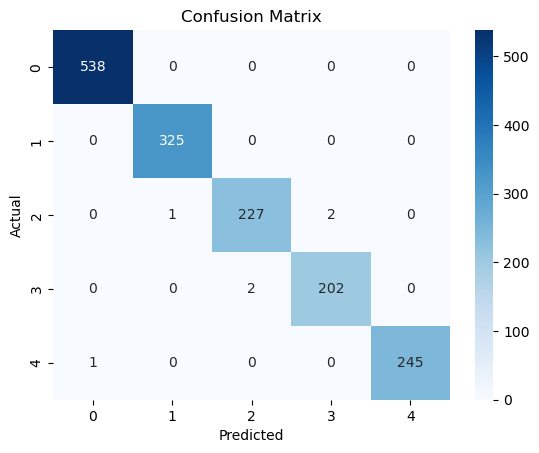

In [41]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_stacked)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

y_true = y_test
y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_true, y_pred)
accuracy

0.9695398574206092